In [95]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

dataset = pd.read_excel('C:/Users/andre/Desktop/cypto_data_kepo.xlsx', index_col='datetime ')
btc = dataset.loc[:, ['BTC']]
btc['ret'] = btc.pct_change()
btc['lag1'] = btc['ret'].shift(1)
btc['lag2'] = btc['ret'].shift(2)
btc['lag3'] = btc['ret'].shift(3)

btc.dropna(inplace=True)
btc

,BTC,ret,lag1,lag2,lag3
datetime,,,,,
2020-09-28 23:59:59,10696.12,-0.007252,0.004255,0.003924,-0.004624
2020-09-29 23:59:59,10840.48,0.013496,-0.007252,0.004255,0.003924
2020-09-30 23:59:59,10776.59,-0.005894,0.013496,-0.007252,0.004255
2020-10-01 23:59:59,10619.13,-0.014611,-0.005894,0.013496,-0.007252
2020-10-02 23:59:59,10570.40,-0.004589,-0.014611,-0.005894,0.013496
...,...,...,...,...,...
2021-10-12 23:59:22,56000.43,-0.025504,0.050907,-0.004284,0.018089
2021-10-13 23:59:59,57367.00,0.024403,-0.025504,0.050907,-0.004284
2021-10-14 23:59:59,57347.94,-0.000332,0.024403,-0.025504,0.050907


In [153]:
# l'obiettivo è dividere i rendimenti in 2 cluster: rendimenti con upward movements e rendimenti con downward movements
model = KMeans(n_clusters=2, random_state=0)
model.fit(btc[['ret', 'lag1', 'lag2', 'lag3']].to_numpy())

btc['cluster'] = model.predict(btc[['ret', 'lag1', 'lag2', 'lag3']].to_numpy())
btc['cluster'] = btc['cluster'].replace((1, 0), (-1, 1))

#print(model.predict(btc[['ret', 'lag1', 'lag2', 'lag3']].to_numpy()))
print(btc['cluster'])

datetime 
2020-09-28 23:59:59   -1
2020-09-29 23:59:59    1
2020-09-30 23:59:59   -1
2020-10-01 23:59:59   -1
2020-10-02 23:59:59    1
                      ..
2021-10-12 23:59:22   -1
2021-10-13 23:59:59    1
2021-10-14 23:59:59    1
2021-10-15 23:59:59    1
2021-10-16 23:59:59   -1
Name: cluster, Length: 384, dtype: int64


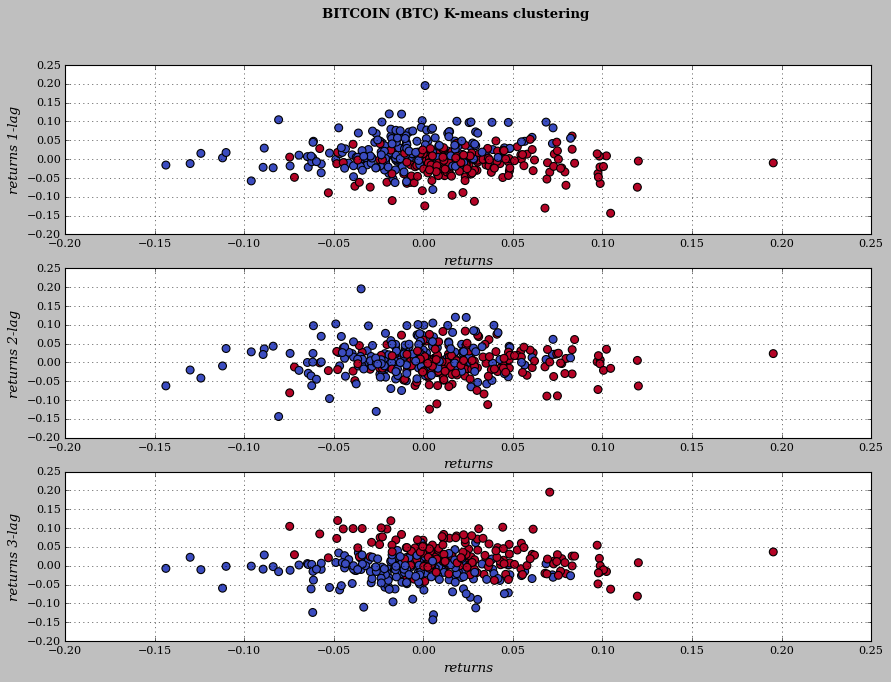

In [154]:
from pylab import mpl, plt
plt.style.use('classic')
mpl.rcParams['font.family'] = 'serif'

plt.figure(figsize=(13, 9))

for i in range(1, 4):
    plt.subplot(3, 1, i)
    plt.grid()
    plt.scatter(btc['ret'], btc[f'lag{i}'], c=btc['cluster'], cmap='coolwarm', s=50)
    plt.xlabel('returns', fontstyle='italic')
    plt.ylabel(f'returns {i}-lag', fontstyle='italic')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.suptitle('BITCOIN (BTC) K-means clustering', fontweight='bold')
plt.show()

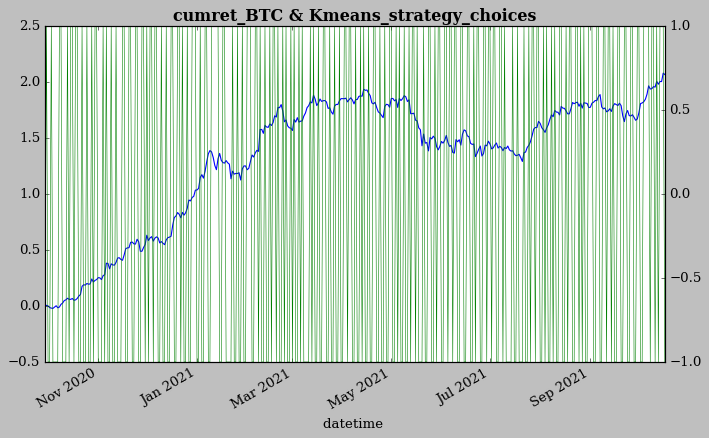

troppi transaction costs


In [155]:
plt.figure(figsize=(10, 6))
btc['ret'].cumsum().plot()
btc['cluster'].plot(secondary_y=True, linewidth=0.5)
plt.title('cumret_BTC & Kmeans_strategy_choices', fontweight='bold')
plt.show()
print('troppi transaction costs')

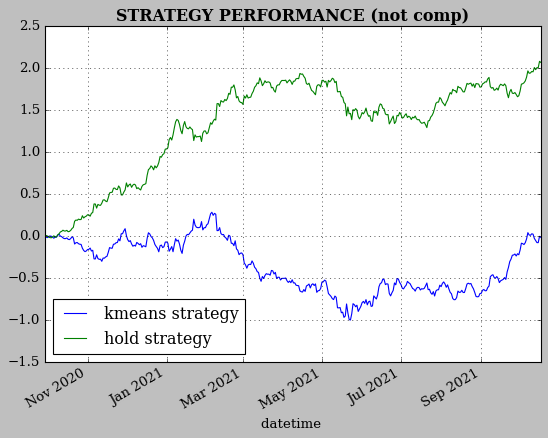

In [159]:
kmeans_strtg = (btc['cluster'].shift(1) * btc['ret']).cumsum()
hold = btc['ret'].cumsum()

plt.figure()
kmeans_strtg.plot()
hold.plot()
plt.legend(['kmeans strategy', 'hold strategy'], loc='best')
plt.grid()
plt.title('STRATEGY PERFORMANCE (not comp)', fontweight='bold')
plt.show()

In [158]:
btc[['ret', 'cluster']]

,ret,cluster
datetime,,
2020-09-28 23:59:59,-0.007252,-1
2020-09-29 23:59:59,0.013496,1
2020-09-30 23:59:59,-0.005894,-1
2020-10-01 23:59:59,-0.014611,-1
2020-10-02 23:59:59,-0.004589,1
...,...,...
2021-10-12 23:59:22,-0.025504,-1
2021-10-13 23:59:59,0.024403,1
2021-10-14 23:59:59,-0.000332,1


In [161]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=2 * [250], random_state=1)
%time model.fit(data)